In [8]:
import os
import sys
module_path = os.path.abspath(os.path.join('/Users/theot/Documents/SEGR_0D/EGR0D/'))
if module_path not in sys.path:
    sys.path.append(module_path)

#sys.path.remove('/Users/theot/Documents/SEGR_0D/EGR0D/')
print(sys.path)

['/Users/theot/Documents/SEGR_0D/EGR0D/src', '/Users/theot/Documents/SEGR_0D/EGR0D/src', '/Users/theot/Documents/arcane/ARCANE', '/opt/homebrew/anaconda3/envs/can260/lib/python39.zip', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9/lib-dynload', '', '/opt/homebrew/anaconda3/envs/can260/lib/python3.9/site-packages', '/Users/theot/Documents/SEGR_0D/EGR0D']


In [9]:
from egr import *
import time
from egr_multiproc import *
import pandas as pd

In [10]:
if __name__ == '__main__':
    # get the start time
    st = time.time()

    config = case('CH4:1.',                   #fuel compo
                'O2:1. N2:3.76',              #ox compo
                'CO2:0.5',                    #egr compo
                3960.0,                       #thermal output power (kind of useless)
                0.0001,                       #egr rate
                'mol'                         #egr rate unit
                )
    dfs=[]
    pressures = [100000,500000] #initial pressures to test in Pa
    for p in pressures:
        #set reservoirs thermo-state
        config.res.fuel = create_reservoir(config.compo.fuel,'Aramco13.cti', 300.0, p)
        config.res.ox = create_reservoir(config.compo.ox,'air.xml', 300.0, p)
        config.res.egr = create_reservoir(config.compo.egr,'Aramco13.cti', 800.0, p)

        #range of computation
        egr_percentages = np.arange(0.0,0.11,0.05)
        df = pd.DataFrame()
        for egr_rate in egr_percentages:
            config.egr_rate = egr_rate #override config.egr_rate set during object instanciation
            phi_range = np.arange(0.7,1.35,0.05)
            reactor,results,pdresult = compute_solutions_1D(config,phi_range,power_regulation=False)
            #plt.plot(phi_range,results[:,4],label='EGR reacteurs:'+str(round(config.egr_rate*100,1)),marker='o')
            #subplot_data(phi_range,results,'Phi',['T[K]','HRR[W/m3]','Y_O2','Y_CO2'],'EGR rate (%):'+str(round(config.egr_rate*100,1))+'%')
            df=pd.concat([df,pdresult])
        
        #df = df.pivot_table(index='phi',columns='EGR',values='u')
        #print_reactor(df)
        # get the end time
        et = time.time()

        # get the execution time
        elapsed_time = et - st
        print('Execution time:', elapsed_time, 'seconds')
        dfs.append(df)

/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:103: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:103: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.5846695908634124e-31


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 6.474580775648694e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.792880005896611e-33


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.8000698029072547e-31


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.320315584512775e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 6.448110269918573e-32


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.3508473528859404e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 6.242912592126379e-32


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 9.150078689326129e-32


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 7.346389743178324e-32


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.940987284149799e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 5.264232126879273e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.0185265715804385e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.376764462663812e-31


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.7551920815402673e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.35639877597393e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.57866267855198e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.800477306357334e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.0182567133716956e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.2326917094642986e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.4424279137962137e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.647567437809196e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.8480208291291843e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.0422514157185506e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.230947559693906e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.4135313728656375e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.590426560372994e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.760593050302135e-25


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.925311271518233e-25
Execution time: 33462.67311692238 seconds


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:103: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:103: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWa

flame 1.465878160494754e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 8.695068401626142e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.102197031729422e-29


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.3827497077857434e-31


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.0644168342803127e-35


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 5.367572598079459e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 5.20798304146958e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.691700657490813e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.912838553028093e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 3.264153106800191e-26


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.2727318788577894e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.443694048779559e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.150234902210789e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.2717661509602885e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 5.532681813226525e-30


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 6.383633594158177e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.7021200475493694e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.7094563265549086e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.8132669374399147e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 0.0


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 4.661535099357379e-28


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.0951557492665061e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.2127855835942284e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.330713709548657e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.4482628878082347e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.5649724434219818e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.6804075162671032e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.79412522727685e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 1.9058556240696015e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.0152984084117866e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.122311289669835e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.2264150946669687e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.327727128773285e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.4225052592735832e-21


/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:188: UserWarning: NasaPoly2::validate: 
For species CH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  107.5046684
	Value computed using high-temperature polynomial: 107.34847808033334

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWarning: NasaPoly2::validate: 
For species OH*, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  gas = ct.Solution(scheme)
/Users/theot/Documents/SEGR_0D/EGR0D/src/egr.py:108: UserWa

flame 2.521219566096306e-21
Execution time: 92976.93990707397 seconds


In [11]:
dfsi=dfs
filenames = ['df'+str(idx)+'.pkl' for idx in range(len(dfsi))]
[df.to_pickle(filenames[idx]) for idx,df in enumerate(dfsi)]

[None, None]

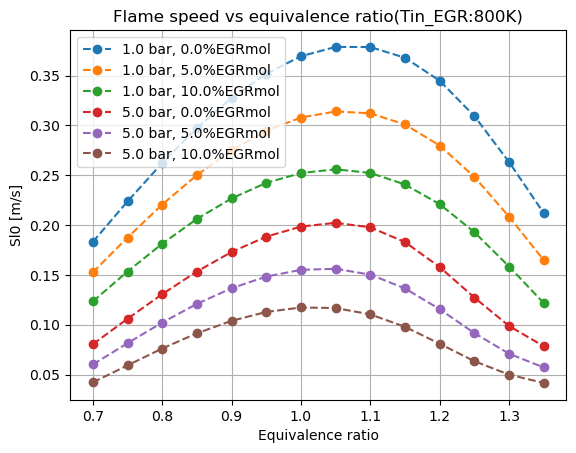

In [13]:
#filenames = ['df'+str(idx)+'.pkl' for idx in range(2)]

dfsr = []
[dfsr.append(pd.read_pickle(file)) for file in filenames]
dfs_unique_var=[df.pivot_table(index='phi',columns='EGR',values='u') for df in dfsr]

fig, ax = plt.subplots(1,1)

dfsc=pd.concat(dfs_unique_var, axis = 1)

human_labels = [(str(round(p/100000,1))+' bar, '+str(round(e*100,1))+"%EGRmol") for p in pressures for e in egr_percentages]
T=800
dfsc.plot(ax=ax, style='--o',title='Flame speed vs equivalence ratio'+'(Tin_EGR:'+str(round(T,0))+'K)',
            #Pin:'+str(round(P/100000,0))+'bar)',
            xlabel='Equivalence ratio',ylabel='Sl0 [m/s]')

#equilibrate_data=main()
#equilibrate_data=equilibrate_data.pivot_table(columns='EGR',index='phi',values='T')
#equilibrate_data.plot(ax=ax, style='--x',title='Temperature vs equivalence ratio',xlabel='Equivalence ratio',ylabel='T',legend=False, label='EGR Reactor')

plt.grid()
plt.legend(loc='best')
ax.legend(human_labels)
plt.show()